# Monte Carlo Simulator for Retirement Planning

This aim of this project is to use a monte carlo style approach to estimate the probability of a person achieving their financial goals for when they retire.

Retirement planning is uncertain as money growth will depend on investment returns. If you assumed a fixed return every year, this would be simple as it could just be calculated as compound interest. However real markets are not that stabale and can (and do) fluctuate.

Monte carlo helps model possible outcomes as instead of a fixed percentage return we pretend each year's return is random and drawn from a distribution with:
* A mean (the average expected return)
* A standard deviation (volatility, or how much returns may vary)
And each simulation is one possible future of the final retirement savings. As we run thousands of these simulations, this gives us a wide range of outcomes and allows us to estimate the probability of reaching a financial target.

## Imports and Setup

Before we can run simulations we need to import the python libraries that will help us:
* NumPy: for generating random returns and handling numerical calculations.
* Pandas: for organizing simulation results in a structured way.
* Matplotlib / Seaborn: for creating visualizations of the outcomes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Input Definition

Now that the libraries are ready, we need to define the simulation's inputs. These are the values that represent the assumptions about a person's retirement plan:
* Initial savings: how much money is already saved today.
* Annual contribution: how much is added to savings each year.
* Expected return: the average yearly investment return (e.g. 6%).
* Volatility: how much the yearly return fluctuates (measured as standard deviation, e.g. 15%).
* Years until retirement: the time horizon of the investment plan.
* Target: the amount the person wants to have at retirement.
* Number of simulations: how many Monte Carlo trials we want to run. More simulations = more accuracy.
These parameters can be adjusted to explore different scenarios

In [2]:
# Retirement planning assumptions
initial_savings = 10_000       # starting balance (£)
annual_contribution = 5_000    # yearly contribution (£)
expected_return = 0.06         # average return
volatility = 0.15              # standard deviation
years = 35                     # investment horizon
target = 1_000_000             # retirement target (£)

# Monte Carlo setup
simulations = 10_000           # number of runs

## Simulation Function

With our assumptions now defined, we can build a function that simulates retirement savings.

This process looks like:
1. Start with initial savings
2. For each year until retirement
   * Add the annual contribution
   * Apply a yearly random return (drawn from a normal distribution with the given mean and standard deviation)
3. At the end of the period record the final balance

Running this thousands of times gives us a good distribution of possible outcomes

In [3]:
def run_simulation(initial_savings, annual_contribution, expected_return, volatility, years):
    """
    Run a single Monte Carlo simulation of retirement savings.
    
    Returns a list of balances for each year.
    """
    balances = [initial_savings]
    balance = initial_savings
    
    for _ in range(years):
        # Add contribution
        balance += annual_contribution
        # Apply random return drawn from normal distribution
        yearly_return = np.random.normal(expected_return, volatility)
        balance *= (1 + yearly_return)
        balances.append(balance)
    
    return balances


def run_monte_carlo(simulations, **kwargs):
    """
    Run multiple simulations and collect the final balances.
    
    Returns:
        - results: list of all final balances
        - paths: list of all yearly balances (for plotting paths)
    """
    results = []
    paths = []
    
    for _ in range(simulations):
        balances = run_simulation(**kwargs)
        results.append(balances[-1])  # final balance
        paths.append(balances)        # full path
    
    return np.array(results), np.array(paths)

## Running Monte Carlo Simulation

Now we have defined our simulation functions, we can run the Monte Carlo simulation using the assumptions that have already been defined.

After running the simulation, we can look at:
* Key Statistics
  * Median
  * Best/Worst Case
  * Proability of hitting the target
* Take a closer look into a few trajectories of savings over time

In [4]:
# Run the Monte Carlo simulation
final_balances, all_paths = run_monte_carlo(
    simulations=simulations,
    initial_savings=initial_savings,
    annual_contribution=annual_contribution,
    expected_return=expected_return,
    volatility=volatility,
    years=years
)

# Calculate key statistics
median_balance = np.median(final_balances)
success_probability = np.mean(final_balances >= target) * 100
best_10_percent = np.percentile(final_balances, 90)
worst_10_percent = np.percentile(final_balances, 10)

# Display results
print(f"Median final balance: £{median_balance:,.0f}")
print(f"Probability of reaching target (£{target:,}): {success_probability:.1f}%")
print(f"Worst 10% outcome: £{worst_10_percent:,.0f}")
print(f"Best 10% outcome: £{best_10_percent:,.0f}")

Median final balance: £540,175
Probability of reaching target (£1,000,000): 16.4%
Worst 10% outcome: £248,734
Best 10% outcome: £1,220,987


## Output Visualisations

Rather than looking at raw numbers, visualisations can help create information that is easier to understand for humans. To better understand the range of possible outcomes, we will create:
* Trajectory Projection: Showing a summary of all the possible retirement paths:
  * Red line → How much you’d have if you only made contributions (no growth).
  * Green line → The median of all simulated outcomes (the “typical” case).
  * Green shaded area → A “likely range” (10th to 90th percentile) of possible outcomes. 
* Histogram of Final Balances: Showing the overall distribution of outcomes at the end of the simulation

These plots are neccesary as they make it easier to not just see the average result, but the uncertainty and spread of possible outcomes as well.

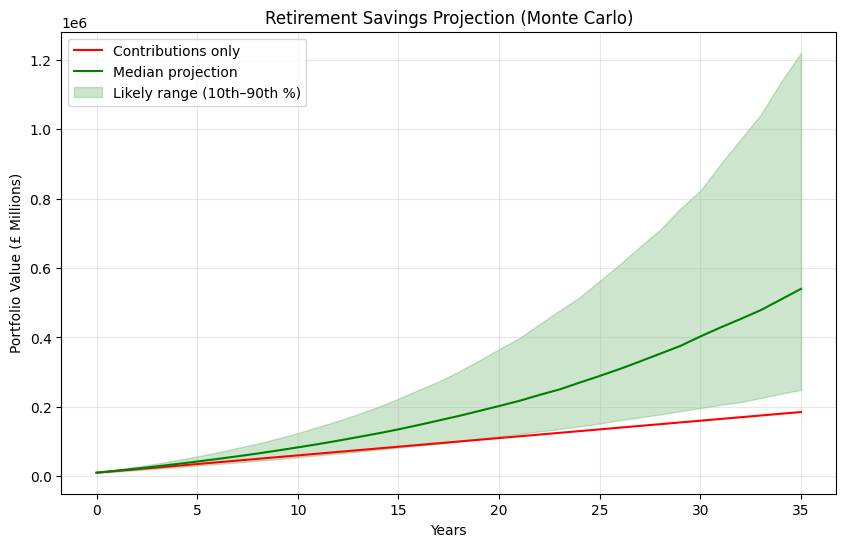

In [ ]:
# Trajectory Predictor

# Calculate yearly statistics across all simulations
median_projection = np.median(all_paths, axis=0)
p10 = np.percentile(all_paths, 10, axis=0)
p90 = np.percentile(all_paths, 90, axis=0)

# Contributions only (no growth, just deposits)
contributions_only = initial_savings + np.arange(0, years+1) * annual_contribution

# Plot
plt.figure(figsize=(10,6))
x = np.arange(0, years+1)

plt.plot(x, contributions_only, color="red", label="Contributions only")
plt.plot(x, median_projection, color="green", label="Median projection")
plt.fill_between(x, p10, p90, color="green", alpha=0.2, label="Likely range (10th–90th %)")

plt.title("Retirement Savings Projection (Monte Carlo)")
plt.xlabel("Years")
plt.ylabel("Portfolio Value (£)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

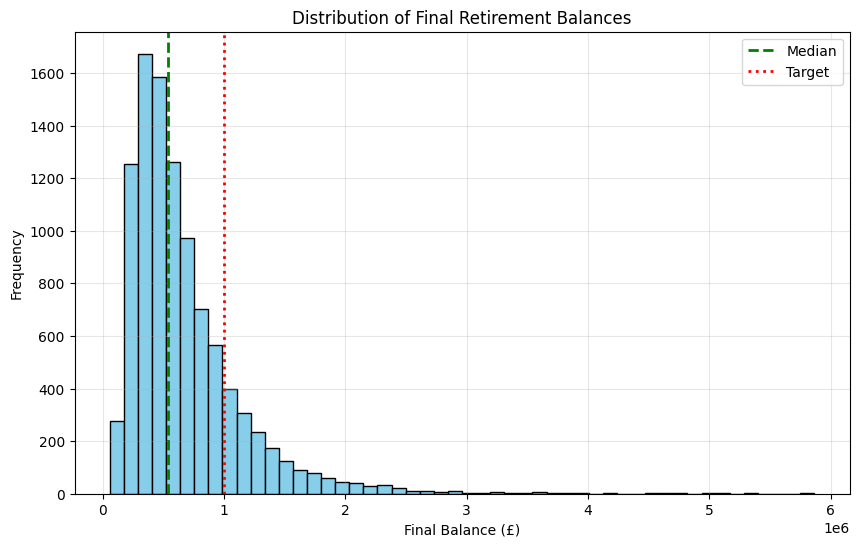

In [6]:
plt.figure(figsize=(10,6))
plt.hist(final_balances, bins=50, color="skyblue", edgecolor="black")
plt.axvline(median_balance, color="green", linestyle="dashed", linewidth=2, label="Median")
plt.axvline(target, color="red", linestyle="dotted", linewidth=2, label="Target")

plt.title("Distribution of Final Retirement Balances")
plt.xlabel("Final Balance (£)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Interactive Experimentation

Instead of manually changing variables in this notebook, we can use `ipywidgets` so you can adjust the assumptions and see how it changes the trajectory in realtime.

In [8]:
import ipywidgets as widgets
from ipywidgets import interact

def interactive_simulation(initial_savings=10_000,
                           annual_contribution=5_000,
                           expected_return=0.06,
                           volatility=0.15,
                           years=35,
                           target=1_000_000,
                           simulations=5000):
    # Run Monte Carlo
    final_balances, all_paths = run_monte_carlo(
        simulations=simulations,
        initial_savings=initial_savings,
        annual_contribution=annual_contribution,
        expected_return=expected_return,
        volatility=volatility,
        years=years
    )
    
    # Summary stats
    median_balance = np.median(final_balances)
    success_probability = np.mean(final_balances >= target) * 100
    p10 = np.percentile(all_paths, 10, axis=0)
    p90 = np.percentile(all_paths, 90, axis=0)
    median_projection = np.median(all_paths, axis=0)
    contributions_only = initial_savings + np.arange(0, years+1) * annual_contribution
    
    # Plot trajectory
    plt.figure(figsize=(10,6))
    x = np.arange(0, years+1)
    plt.plot(x, contributions_only, color="red", label="Contributions only")
    plt.plot(x, median_projection, color="green", label="Median projection")
    plt.fill_between(x, p10, p90, color="green", alpha=0.2, label="Likely range (10–90%)")
    plt.title("Retirement Savings Projection (Monte Carlo)")
    plt.xlabel("Years")
    plt.ylabel("Portfolio Value (£)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Plot histogram
    plt.figure(figsize=(10,6))
    plt.hist(final_balances, bins=50, color="skyblue", edgecolor="black")
    plt.axvline(median_balance, color="green", linestyle="dashed", linewidth=2, label="Median")
    plt.axvline(target, color="red", linestyle="dotted", linewidth=2, label="Target")
    plt.title("Distribution of Final Retirement Balances")
    plt.xlabel("Final Balance (£)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Print summary
    print(f"Median final balance: £{median_balance:,.0f}")
    print(f"Probability of reaching target (£{target:,}): {success_probability:.1f}%")

# Create interactive controls
interact(
    interactive_simulation,
    initial_savings=widgets.IntSlider(value=10_000, min=0, max=100_000, step=1000),
    annual_contribution=widgets.IntSlider(value=5_000, min=1000, max=50_000, step=1000),
    expected_return=widgets.FloatSlider(value=0.06, min=0.01, max=0.15, step=0.01),
    volatility=widgets.FloatSlider(value=0.15, min=0.05, max=0.3, step=0.01),
    years=widgets.IntSlider(value=35, min=5, max=50, step=1),
    target=widgets.IntSlider(value=1_000_000, min=100_000, max=5_000_000, step=50_000),
    simulations=widgets.IntSlider(value=5000, min=1000, max=20000, step=1000)
)


interactive(children=(IntSlider(value=10000, description='initial_savings', max=100000, step=1000), IntSlider(…

<function __main__.interactive_simulation(initial_savings=10000, annual_contribution=5000, expected_return=0.06, volatility=0.15, years=35, target=1000000, simulations=5000)>